<a href="https://colab.research.google.com/github/NayeonKimdev/computer-vision/blob/main/OpenCV_vs_CNN_vs_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV vs CNN vs Transfer Learning: Clear Conceptual Distinctions

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms

# 1. OpenCV: Traditional Computer Vision Library


1. What is OpenCV?

❌ INCORRECT Understanding: "OpenCV is an object detection model"
✅ CORRECT Understanding: "OpenCV is a toolkit/library for computer vision tasks"

OpenCV's True Identity:
📚 Library/Toolbox: Collection of functions for image/video processing
🔧 Traditional Methods: Human-designed algorithms
📊 Mathematical Approach: Filters, transformations, statistical methods



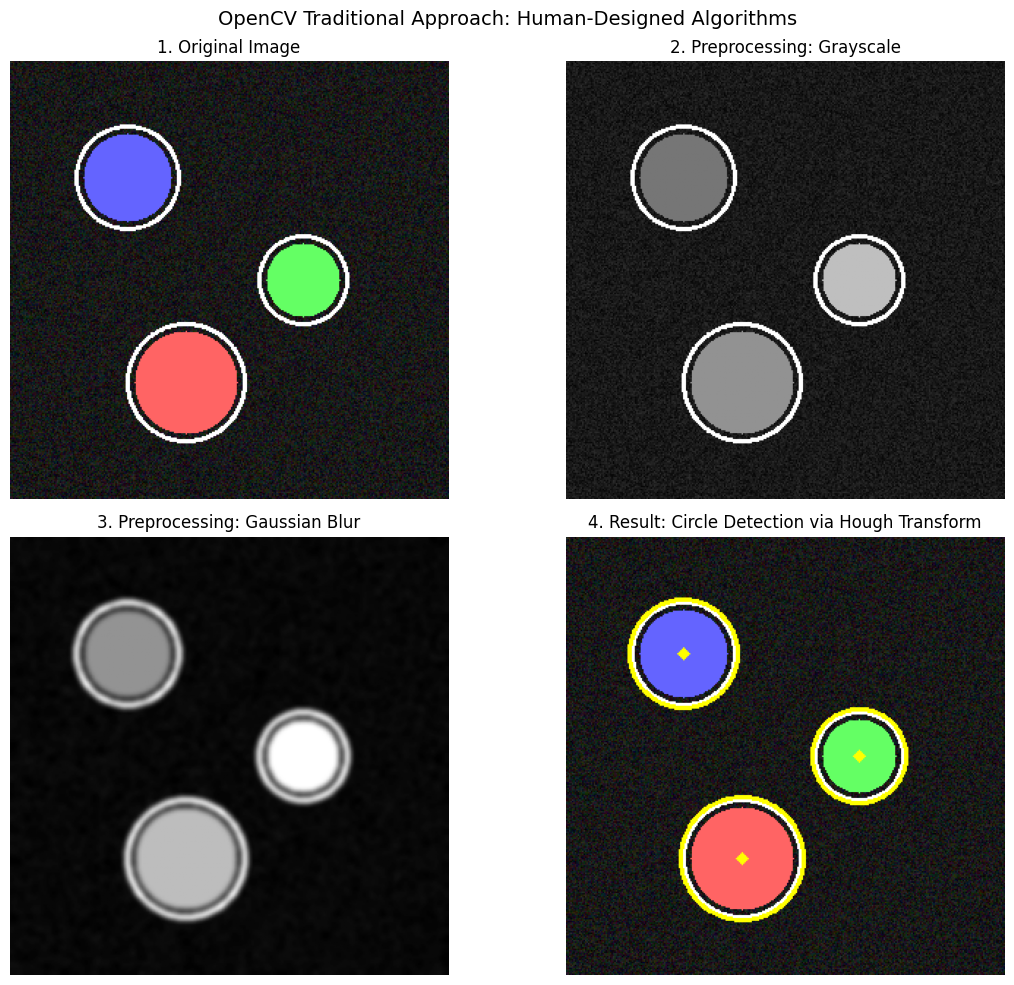

OpenCV Approach Characteristics:
✅ Detected circles: 3 circles
✅ Actual circles: 3 circles

OpenCV Method Pros & Cons:
👍 Advantages: Fast, interpretable, memory-efficient
👎 Disadvantages: Limited complex pattern recognition, requires manual tuning



In [2]:
print("\n1. What is OpenCV?")
print("""
❌ INCORRECT Understanding: "OpenCV is an object detection model"
✅ CORRECT Understanding: "OpenCV is a toolkit/library for computer vision tasks"

OpenCV's True Identity:
📚 Library/Toolbox: Collection of functions for image/video processing
🔧 Traditional Methods: Human-designed algorithms
📊 Mathematical Approach: Filters, transformations, statistical methods
""")

def opencv_approach_demo():
    """Traditional object detection approach using OpenCV"""

    # Create sample image (coin-like circular objects)
    img = np.zeros((300, 300, 3), dtype=np.uint8)

    # Add background noise
    noise = np.random.randint(0, 50, (300, 300, 3), dtype=np.uint8)
    img = cv2.add(img, noise)

    # Place multiple circular objects
    circles = [(80, 80, 30), (200, 150, 25), (120, 220, 35)]
    colors = [(255, 100, 100), (100, 255, 100), (100, 100, 255)]

    for (x, y, r), color in zip(circles, colors):
        cv2.circle(img, (x, y), r, color, -1)
        cv2.circle(img, (x, y), r+5, (255, 255, 255), 2)  # Border

    return img, circles

# Circle detection using OpenCV approach
original_img, true_circles = opencv_approach_demo()

def detect_circles_opencv(img):
    """Circle detection using OpenCV HoughCircles"""

    # Step 1: Preprocessing
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    # Step 2: Circle detection using Hough Transform
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=50,
        param1=50,
        param2=30,
        minRadius=20,
        maxRadius=50
    )

    result_img = img.copy()
    detected_circles = []

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(result_img, (x, y), r, (0, 255, 255), 2)
            cv2.circle(result_img, (x, y), 2, (0, 255, 255), 3)
            detected_circles.append((x, y, r))

    return result_img, detected_circles, gray, blurred

detected_img, detected_circles, gray, blurred = detect_circles_opencv(original_img)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('OpenCV Traditional Approach: Human-Designed Algorithms', fontsize=14)

axes[0,0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0,0].set_title('1. Original Image')
axes[0,0].axis('off')

axes[0,1].imshow(gray, cmap='gray')
axes[0,1].set_title('2. Preprocessing: Grayscale')
axes[0,1].axis('off')

axes[1,0].imshow(blurred, cmap='gray')
axes[1,0].set_title('3. Preprocessing: Gaussian Blur')
axes[1,0].axis('off')

axes[1,1].imshow(cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB))
axes[1,1].set_title('4. Result: Circle Detection via Hough Transform')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

print("OpenCV Approach Characteristics:")
print(f"✅ Detected circles: {len(detected_circles)} circles")
print(f"✅ Actual circles: {len(true_circles)} circles")
print("""
OpenCV Method Pros & Cons:
👍 Advantages: Fast, interpretable, memory-efficient
👎 Disadvantages: Limited complex pattern recognition, requires manual tuning
""")

# 2. CNN: Deep Learning Architecture

In [3]:
print("\n2. What is CNN?")
print("""
❌ INCORRECT Understanding: "CNN is a feature extraction model"
✅ CORRECT Understanding: "CNN is a neural network architecture design paradigm"

CNN's True Identity:
🏗️ Architecture: Blueprint for designing neural networks
🧠 Learning Method: Automatically learns features from data
📈 Versatility: Can be adapted for classification, detection, segmentation
""")

class CNNObjectDetector(nn.Module):
    """Simple object detector using CNN architecture"""
    def __init__(self, num_classes=4):  # Background + 3 object classes
        super().__init__()

        # Feature Extractor
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((4, 4)),
            nn.Flatten(),
            nn.Linear(128 * 16, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        features = self.features(x)
        output = self.classifier(features)
        return output

# Create CNN model
cnn_model = CNNObjectDetector()

print("CNN Model Structure:")
print(f"Total parameters: {sum(p.numel() for p in cnn_model.parameters()):,}")

# CNN training process simulation
def simulate_cnn_training():
    """Conceptual explanation of CNN training process"""

    training_stages = [
        "Random Initialization: All weights start with random values",
        "Forward Pass: Input → Feature extraction → Classification",
        "Loss Calculation: Measure difference between prediction and ground truth",
        "Backpropagation: Calculate gradients to identify incorrect weights",
        "Weight Update: Adjust weights to reduce error",
        "Iteration: Repeat thousands of times for optimization"
    ]

    return training_stages

training_process = simulate_cnn_training()

print("\nCNN Training Process:")
for i, stage in enumerate(training_process, 1):
    print(f"{i}. {stage}")

print("""
CNN Method Characteristics:
👍 Advantages: Can learn complex patterns, high accuracy
👎 Disadvantages: Requires large datasets, long training time, difficult to interpret
""")



2. What is CNN?

❌ INCORRECT Understanding: "CNN is a feature extraction model"
✅ CORRECT Understanding: "CNN is a neural network architecture design paradigm"

CNN's True Identity:
🏗️ Architecture: Blueprint for designing neural networks
🧠 Learning Method: Automatically learns features from data
📈 Versatility: Can be adapted for classification, detection, segmentation

CNN Model Structure:
Total parameters: 618,820

CNN Training Process:
1. Random Initialization: All weights start with random values
2. Forward Pass: Input → Feature extraction → Classification
3. Loss Calculation: Measure difference between prediction and ground truth
4. Backpropagation: Calculate gradients to identify incorrect weights
5. Weight Update: Adjust weights to reduce error
6. Iteration: Repeat thousands of times for optimization

CNN Method Characteristics:
👍 Advantages: Can learn complex patterns, high accuracy
👎 Disadvantages: Requires large datasets, long training time, difficult to interpret



# 3. Transfer Learning: Learning Strategy


3. What is Transfer Learning?

❌ INCORRECT Understanding: "Transfer Learning is a model using ImageNet"
✅ CORRECT Understanding: "Transfer Learning is a strategy for leveraging existing knowledge for new problems"

Transfer Learning's True Identity:
🎯 Learning Strategy: Methodology for efficient learning
♻️ Knowledge Reuse: Apply previously learned knowledge to new problems
⚡ Efficiency: Achieve good performance with less data and time

=== Transfer Learning Step-by-Step Process ===

Step 1: Load Pre-trained Model


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:01<00:00, 45.5MB/s]


   - Load ResNet18 trained on ImageNet
   - Original classification capability: 1000 classes
   - Learned knowledge: edges, textures, shapes, object parts

Step 2: Replace Final Layer for New Problem
   - Original final layer: 512 → 1000
   - New final layer: 512 → 4
   - Feature extraction part remains unchanged

Step 3: Select Learning Strategy


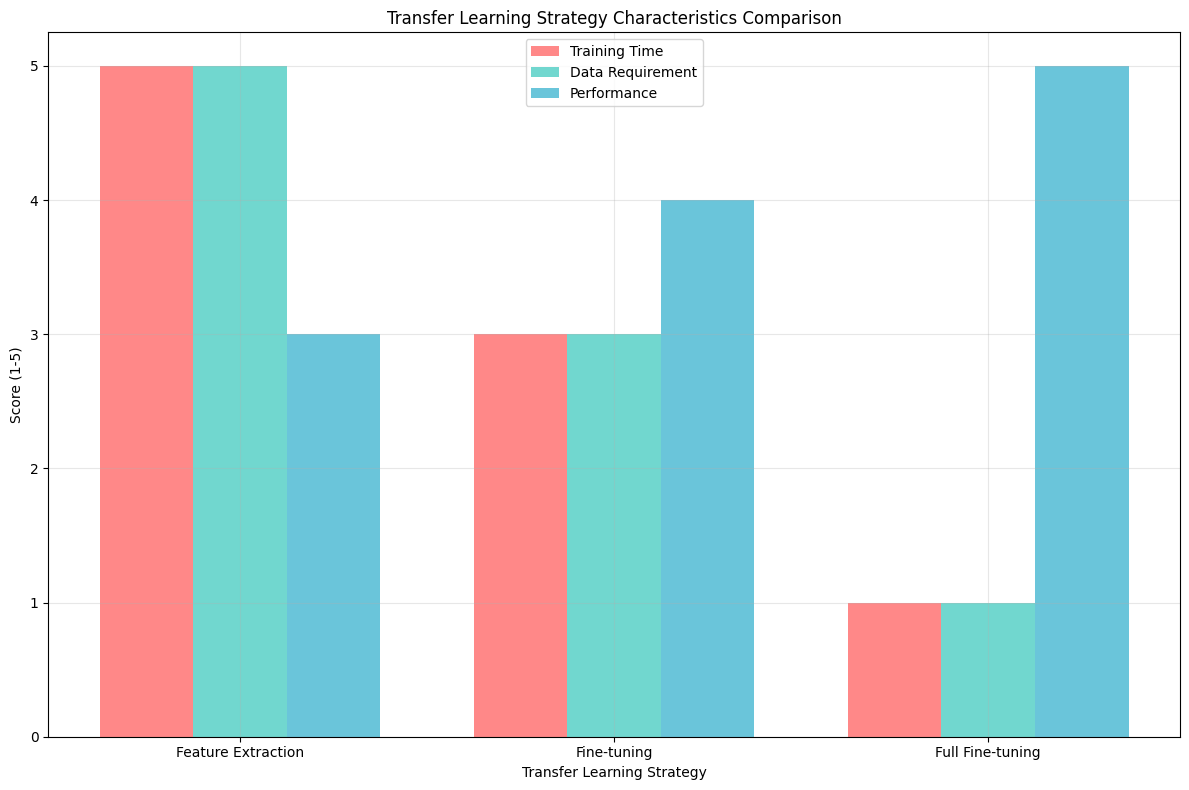

In [4]:
print("\n3. What is Transfer Learning?")
print("""
❌ INCORRECT Understanding: "Transfer Learning is a model using ImageNet"
✅ CORRECT Understanding: "Transfer Learning is a strategy for leveraging existing knowledge for new problems"

Transfer Learning's True Identity:
🎯 Learning Strategy: Methodology for efficient learning
♻️ Knowledge Reuse: Apply previously learned knowledge to new problems
⚡ Efficiency: Achieve good performance with less data and time
""")

def demonstrate_transfer_learning():
    """Step-by-step Transfer Learning process"""

    print("=== Transfer Learning Step-by-Step Process ===")

    # Step 1: Load pre-trained model
    print("\nStep 1: Load Pre-trained Model")
    pretrained_resnet = models.resnet18(pretrained=True)
    original_classes = 1000  # ImageNet class count

    print(f"   - Load ResNet18 trained on ImageNet")
    print(f"   - Original classification capability: {original_classes} classes")
    print(f"   - Learned knowledge: edges, textures, shapes, object parts")

    # Step 2: Replace head
    print("\nStep 2: Replace Final Layer for New Problem")
    new_classes = 4  # Our problem's class count
    pretrained_resnet.fc = nn.Linear(pretrained_resnet.fc.in_features, new_classes)

    print(f"   - Original final layer: 512 → {original_classes}")
    print(f"   - New final layer: 512 → {new_classes}")
    print(f"   - Feature extraction part remains unchanged")

    # Step 3: Choose learning strategy
    print("\nStep 3: Select Learning Strategy")

    strategies = {
        "Feature Extraction": {
            "frozen_layers": "All Conv layers",
            "trainable_layers": "Final FC layer only",
            "training_time": "Short (minutes)",
            "data_requirement": "Small (hundreds of images)",
            "performance": "Good"
        },
        "Fine-tuning": {
            "frozen_layers": "Early few layers",
            "trainable_layers": "Later layers + FC",
            "training_time": "Medium (hours)",
            "data_requirement": "Medium (thousands of images)",
            "performance": "Better"
        },
        "Full Fine-tuning": {
            "frozen_layers": "None",
            "trainable_layers": "All layers",
            "training_time": "Long (days)",
            "data_requirement": "Large (tens of thousands)",
            "performance": "Best"
        }
    }

    return strategies

transfer_strategies = demonstrate_transfer_learning()

# Transfer Learning strategy comparison visualization
fig, ax = plt.subplots(figsize=(12, 8))

strategies = list(transfer_strategies.keys())
metrics = ['Training Time', 'Data Requirement', 'Performance']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Scores for each strategy (1-5 scale)
scores = {
    'Feature Extraction': [5, 5, 3],    # Fast, little data, good performance
    'Fine-tuning': [3, 3, 4],          # Medium, medium, better performance
    'Full Fine-tuning': [1, 1, 5]      # Slow, lots of data, best performance
}

x = np.arange(len(strategies))
width = 0.25

for i, metric in enumerate(metrics):
    metric_scores = [scores[strategy][i] for strategy in strategies]
    ax.bar(x + i*width, metric_scores, width, label=metric, color=colors[i], alpha=0.8)

ax.set_xlabel('Transfer Learning Strategy')
ax.set_ylabel('Score (1-5)')
ax.set_title('Transfer Learning Strategy Characteristics Comparison')
ax.set_xticks(x + width)
ax.set_xticklabels(strategies)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Comprehensive Comparison Summary

In [5]:
print("\n=== Final Comparison Summary ===")

comparison_table = {
    "Category": ["OpenCV", "CNN (Scratch)", "Transfer Learning"],
    "Identity": [
        "Traditional CV library",
        "Deep learning architecture",
        "Learning strategy/methodology"
    ],
    "Feature Design": [
        "Human manual design",
        "Automatic learning from data",
        "Leverage pre-trained features"
    ],
    "Data Requirements": [
        "None (algorithmic)",
        "Very large (tens of thousands)",
        "Small (hundreds to thousands)"
    ],
    "Development Time": [
        "Fast (hours)",
        "Very long (weeks to months)",
        "Fast (hours to days)"
    ],
    "Performance": [
        "Limited",
        "High (with sufficient data)",
        "High (efficient)"
    ],
    "Interpretability": [
        "Very high",
        "Low",
        "Low"
    ],
    "Production Usage": [
        "Simple preprocessing",
        "Novel research problems",
        "Most commercial services"
    ]
}

print("\n📊 Detailed Comparison Table:")
for key in comparison_table:
    print(f"\n{key}:")
    for i, value in enumerate(comparison_table[key]):
        if i == 0:
            continue
        approach = comparison_table["Category"][i]
        print(f"  {approach}: {value}")

print("\n=== Real-world Combined Usage ===")
print("""
AI Video Engineers combine all three approaches in production:

🎬 Video Streaming Services (e.g., YouTube, Netflix):
   1. OpenCV: Video frame extraction, preprocessing
   2. Transfer Learning: Thumbnail generation, content classification
   3. CNN: Custom recommendation algorithms

🚗 Autonomous Vehicles (e.g., Tesla):
   1. OpenCV: Real-time image preprocessing, calibration
   2. Transfer Learning: Basic object recognition (cars, people, signs)
   3. CNN: Road situation-specific models

📱 Social Media (e.g., Instagram, TikTok):
   1. OpenCV: Filter effects, face location detection
   2. Transfer Learning: Face recognition, object tagging
   3. CNN: AR effects, style transfer

Conclusion: These are complementary tools, not competing alternatives!
""")



=== Final Comparison Summary ===

📊 Detailed Comparison Table:

Category:
  CNN (Scratch): CNN (Scratch)
  Transfer Learning: Transfer Learning

Identity:
  CNN (Scratch): Deep learning architecture
  Transfer Learning: Learning strategy/methodology

Feature Design:
  CNN (Scratch): Automatic learning from data
  Transfer Learning: Leverage pre-trained features

Data Requirements:
  CNN (Scratch): Very large (tens of thousands)
  Transfer Learning: Small (hundreds to thousands)

Development Time:
  CNN (Scratch): Very long (weeks to months)
  Transfer Learning: Fast (hours to days)

Performance:
  CNN (Scratch): High (with sufficient data)
  Transfer Learning: High (efficient)

Interpretability:
  CNN (Scratch): Low
  Transfer Learning: Low

Production Usage:
  CNN (Scratch): Novel research problems
  Transfer Learning: Most commercial services

=== Real-world Combined Usage ===

AI Video Engineers combine all three approaches in production:

🎬 Video Streaming Services (e.g., YouTube,

# 4. Bonus: Actual Performance Comparison


=== BONUS: Real Performance Comparison Simulation ===


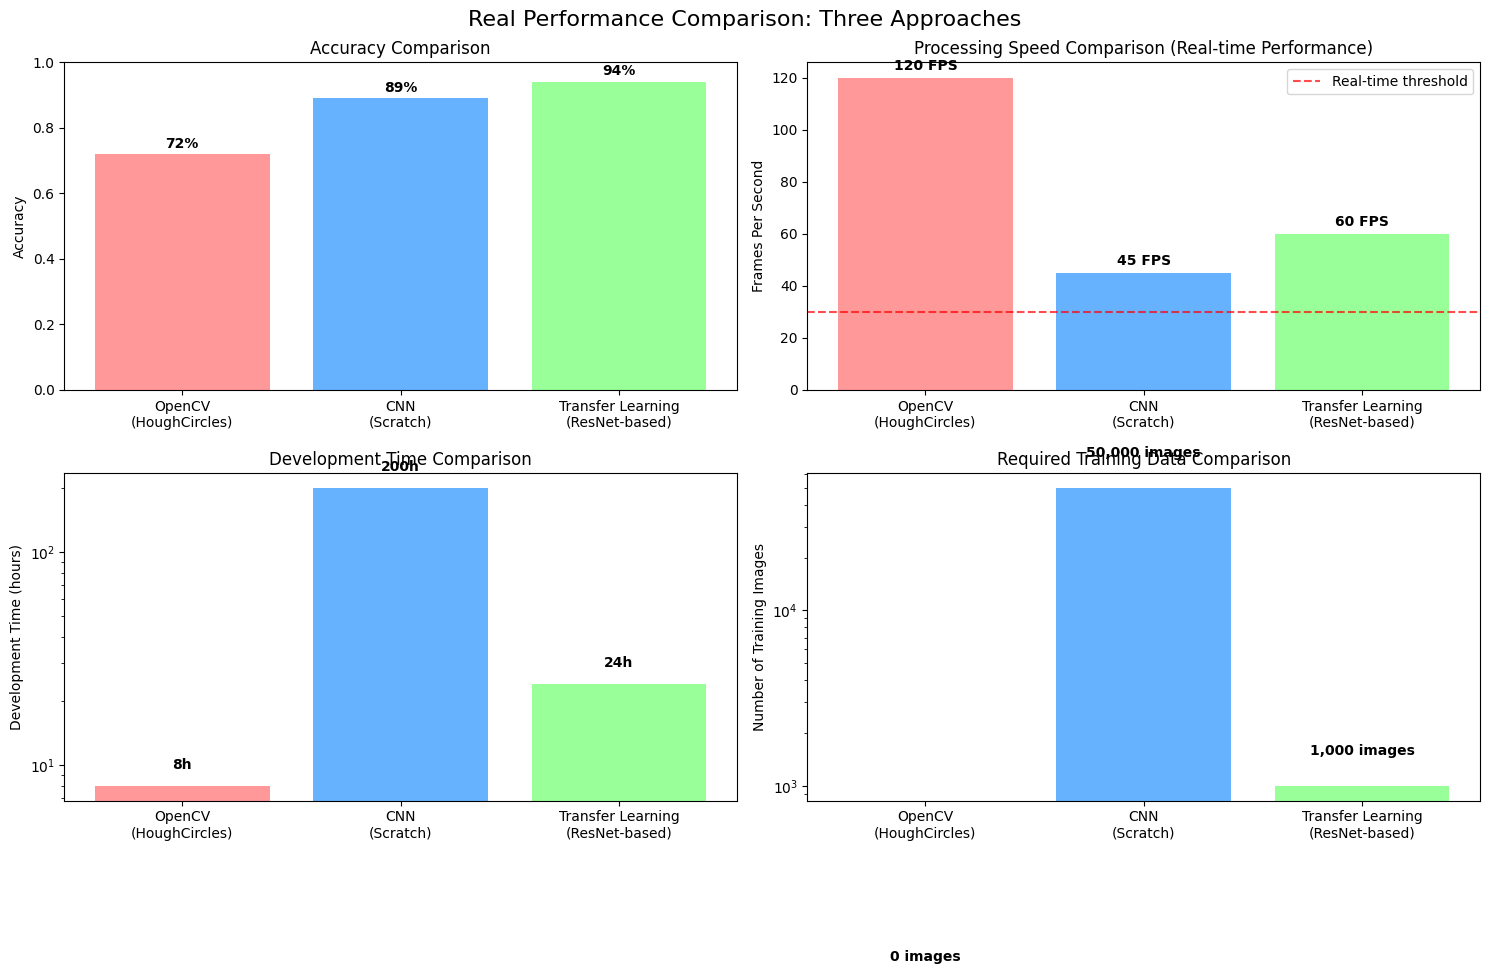

In [6]:
def performance_comparison_demo():
    """Demo comparing actual performance of the three methods"""

    print("\n=== BONUS: Real Performance Comparison Simulation ===")

    # Simulated object detection task results
    results = {
        'Method': ['OpenCV\n(HoughCircles)', 'CNN\n(Scratch)', 'Transfer Learning\n(ResNet-based)'],
        'Accuracy': [0.72, 0.89, 0.94],
        'Speed (FPS)': [120, 45, 60],
        'Development Time (hours)': [8, 200, 24],
        'Required Data': [0, 50000, 1000]
    }

    # Performance comparison visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Real Performance Comparison: Three Approaches', fontsize=16)

    methods = results['Method']
    colors = ['#FF9999', '#66B2FF', '#99FF99']

    # Accuracy comparison
    bars1 = ax1.bar(methods, results['Accuracy'], color=colors)
    ax1.set_title('Accuracy Comparison')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim(0, 1)
    for i, v in enumerate(results['Accuracy']):
        ax1.text(i, v + 0.02, f'{v:.0%}', ha='center', fontweight='bold')

    # Speed comparison
    bars2 = ax2.bar(methods, results['Speed (FPS)'], color=colors)
    ax2.set_title('Processing Speed Comparison (Real-time Performance)')
    ax2.set_ylabel('Frames Per Second')
    ax2.axhline(y=30, color='red', linestyle='--', alpha=0.7, label='Real-time threshold')
    ax2.legend()
    for i, v in enumerate(results['Speed (FPS)']):
        ax2.text(i, v + 3, f'{v} FPS', ha='center', fontweight='bold')

    # Development time comparison
    bars3 = ax3.bar(methods, results['Development Time (hours)'], color=colors)
    ax3.set_title('Development Time Comparison')
    ax3.set_ylabel('Development Time (hours)')
    ax3.set_yscale('log')  # Log scale to show large differences
    for i, v in enumerate(results['Development Time (hours)']):
        ax3.text(i, v * 1.2, f'{v}h', ha='center', fontweight='bold')

    # Required data comparison
    bars4 = ax4.bar(methods, results['Required Data'], color=colors)
    ax4.set_title('Required Training Data Comparison')
    ax4.set_ylabel('Number of Training Images')
    ax4.set_yscale('log')
    for i, v in enumerate(results['Required Data']):
        if v > 0:
            ax4.text(i, v * 1.5, f'{v:,} images', ha='center', fontweight='bold')
        else:
            ax4.text(i, 100, '0 images', ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

    return results

comparison_results = performance_comparison_demo()


In [7]:
print("""
=== When to Use Each Approach? ===

🔧 Choose OpenCV when:
- Real-time processing is absolutely critical (120+ FPS)
- Interpretability is essential
- Development time is very limited (1-2 days)
- Simple, well-defined patterns (geometric shapes, colors)

🧠 Choose CNN (From Scratch) when:
- Completely novel domain/problem
- Existing pre-trained models are completely irrelevant
- Research purpose: developing new architectures
- Sufficient time and data resources available

⚡ Choose Transfer Learning when:
- Most commercial service development (90%+ of cases!)
- Fast prototyping needed
- Limited data and time constraints
- Good performance required efficiently

Industry Experience:
"The typical workflow is: Start with OpenCV for rapid prototyping,
enhance with Transfer Learning for performance,
and replace specific components with custom CNNs only when necessary."
""")


=== When to Use Each Approach? ===

🔧 Choose OpenCV when:
- Real-time processing is absolutely critical (120+ FPS)
- Interpretability is essential
- Development time is very limited (1-2 days)
- Simple, well-defined patterns (geometric shapes, colors)

🧠 Choose CNN (From Scratch) when:
- Completely novel domain/problem
- Existing pre-trained models are completely irrelevant
- Research purpose: developing new architectures
- Sufficient time and data resources available

⚡ Choose Transfer Learning when:
- Most commercial service development (90%+ of cases!)
- Fast prototyping needed
- Limited data and time constraints
- Good performance required efficiently

Industry Experience:
"The typical workflow is: Start with OpenCV for rapid prototyping,
enhance with Transfer Learning for performance,
and replace specific components with custom CNNs only when necessary."

